In [8]:
!pip install pandas
!pip install scikit-learn

In [87]:
import pandas as pdr
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
customers = pdr.read_csv('test.csv')

In [88]:
customers

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


In [55]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [6]:
customers.describe()

,ID,Age,Work_Experience,Family_Size
count,2627.000000,2627.000000,2358.000000,2514.000000
mean,463433.918919,43.649791,2.552587,2.825378
std,2618.245698,16.967015,3.341094,1.551906
min,458989.000000,18.000000,0.000000,1.000000
25%,461162.500000,30.000000,0.000000,2.000000
50%,463379.000000,41.000000,1.000000,2.000000
75%,465696.000000,53.000000,4.000000,4.000000
max,467968.000000,89.000000,14.000000,9.000000


In [89]:
customers = customers.dropna()

my_dict = {'Low':1, 'Average':2, 'High':3} 
customers['Spending_Score'] = customers['Spending_Score'].replace(my_dict) 
customers

C:\Users\ahmed\AppData\Local\Temp\ipykernel_15264\2420777773.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers['Spending_Score'] = customers['Spending_Score'].replace(my_dict)


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,1,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,2,4.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,3,2.0,Cat_6
5,459003,Male,Yes,47,Yes,Doctor,0.0,3,5.0,Cat_4
6,459005,Male,Yes,61,Yes,Doctor,5.0,1,3.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2621,467950,Female,No,35,Yes,Entertainment,1.0,1,2.0,Cat_6
2622,467954,Male,No,29,No,Healthcare,9.0,1,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,1,1.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,3,5.0,Cat_4


In [90]:
customers.drop(customers.columns[[0, 9]], axis=1, inplace=True)


C:\Users\ahmed\AppData\Local\Temp\ipykernel_15264\1403256990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers.drop(customers.columns[[0, 9]], axis=1, inplace=True)


In [96]:
customers_encoded = customers
encoder = OrdinalEncoder()
encoder.fit(customers[["Gender","Graduated","Ever_Married","Profession"]])
customers[["Gender","Graduated","Ever_Married","Profession"]] = encoder.transform(customers[["Gender","Graduated","Ever_Married","Profession"]])
customers

C:\Users\ahmed\AppData\Local\Temp\ipykernel_15264\3760386077.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers[["Gender","Graduated","Ever_Married","Profession"]] = encoder.transform(customers[["Gender","Graduated","Ever_Married","Profession"]])


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,0.0,1.0,36,1.0,2.0,0.0,1,1.0
1,1.0,1.0,37,1.0,5.0,8.0,2,4.0
3,1.0,1.0,59,0.0,4.0,11.0,3,2.0
5,1.0,1.0,47,1.0,1.0,0.0,3,5.0
6,1.0,1.0,61,1.0,1.0,5.0,1,3.0
...,...,...,...,...,...,...,...,...
2621,0.0,0.0,35,1.0,3.0,1.0,1,2.0
2622,1.0,0.0,29,0.0,5.0,9.0,1,4.0
2623,0.0,0.0,35,1.0,1.0,1.0,1,1.0
2625,1.0,1.0,47,1.0,4.0,1.0,3,5.0


In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(customers)

C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

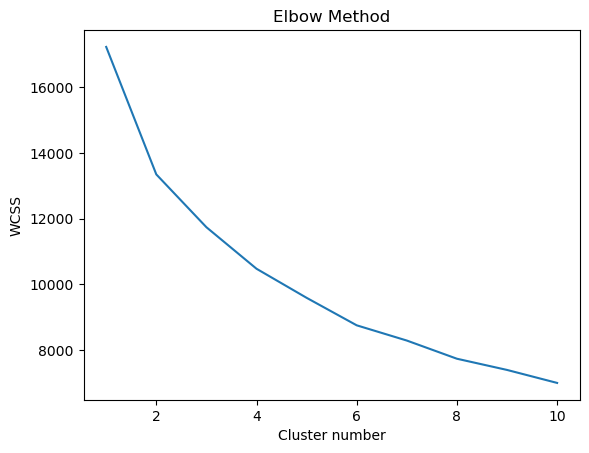

In [99]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state = 30)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Cluster number')
plt.ylabel('WCSS')
plt.show()

In [123]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',random_state=30)
y_kmeans = kmeans.fit_predict(X)

C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [119]:
from sklearn.decomposition import PCA
pc = PCA(n_components = 2)
X_reduce = pc.fit_transform(X)
pc.explained_variance_ratio_


array([0.28350632, 0.18889712])

In [102]:
sum(pc.explained_variance_ratio_)

0.47240343651026373

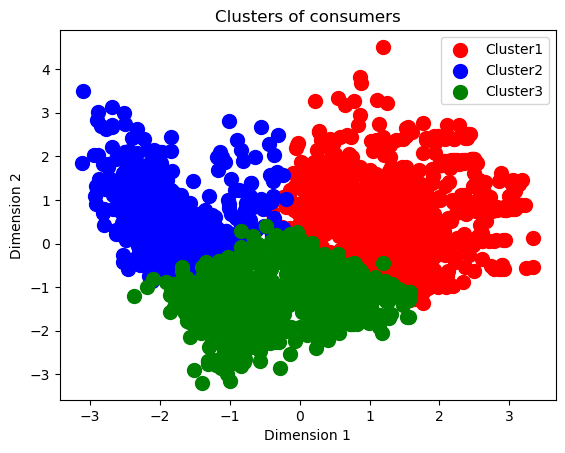

In [124]:
colours = ['red','blue','green']

for i in range(3):
    plt.scatter(X_reduce[y_kmeans == i,0],X_reduce[y_kmeans== i,1],
               s = 100, c=colours[i],label="Cluster"+str(i+1))
plt.title("Clusters of consumers")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()

In [125]:
customers['Cluster']= y_kmeans
customers

C:\Users\ahmed\AppData\Local\Temp\ipykernel_15264\2016164474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers['Cluster']= y_kmeans


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Cluster
0,0.0,1.0,36,1.0,2.0,0.0,1,1.0,2
1,1.0,1.0,37,1.0,5.0,8.0,2,4.0,0
3,1.0,1.0,59,0.0,4.0,11.0,3,2.0,0
5,1.0,1.0,47,1.0,1.0,0.0,3,5.0,0
6,1.0,1.0,61,1.0,1.0,5.0,1,3.0,2
...,...,...,...,...,...,...,...,...,...
2621,0.0,0.0,35,1.0,3.0,1.0,1,2.0,2
2622,1.0,0.0,29,0.0,5.0,9.0,1,4.0,1
2623,0.0,0.0,35,1.0,1.0,1.0,1,1.0,2
2625,1.0,1.0,47,1.0,4.0,1.0,3,5.0,0


In [126]:
customers.groupby('Cluster').mean()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
Cluster,,,,,,,,
0,0.631753,1.000000,55.507166,0.684675,2.854465,1.588754,2.170893,2.922822
1,0.581056,0.094718,27.497268,0.153005,4.129326,2.169399,1.009107,4.009107
2,0.418338,0.448424,40.365330,0.916905,1.498567,4.103152,1.097421,1.803725


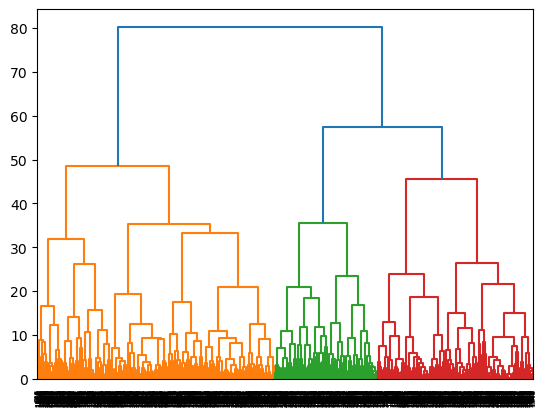

<Figure size 1500x600 with 0 Axes>

In [69]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(X,method = 'ward'))
plt.figure(figsize=(15,6))

plt.show()

In [114]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


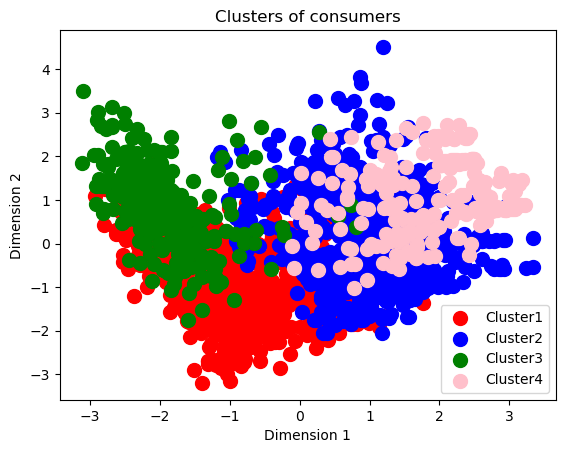

In [115]:
colours = ['red','blue','green','pink']

for i in range(4):
    plt.scatter(X_reduce[y_hc == i,0],X_reduce[y_hc == i,1],
               s = 100, c=colours[i],label="Cluster"+str(i+1))
plt.title("Clusters of consumers")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()

In [116]:
customers['Cluster']= y_hc
customers


C:\Users\ahmed\AppData\Local\Temp\ipykernel_15264\3431402528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers['Cluster']= y_hc


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Cluster
0,0.0,1.0,36,1.0,2.0,0.0,1,1.0,1
1,1.0,1.0,37,1.0,5.0,8.0,2,4.0,0
3,1.0,1.0,59,0.0,4.0,11.0,3,2.0,3
5,1.0,1.0,47,1.0,1.0,0.0,3,5.0,1
6,1.0,1.0,61,1.0,1.0,5.0,1,3.0,0
...,...,...,...,...,...,...,...,...,...
2621,0.0,0.0,35,1.0,3.0,1.0,1,2.0,0
2622,1.0,0.0,29,0.0,5.0,9.0,1,4.0,0
2623,0.0,0.0,35,1.0,1.0,1.0,1,1.0,0
2625,1.0,1.0,47,1.0,4.0,1.0,3,5.0,1


In [117]:
customers.groupby('Cluster').mean()


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
Cluster,,,,,,,,
0,0.430233,0.264535,36.773256,0.831395,2.263081,5.261628,1.174419,2.366279
1,0.634320,1.000000,48.247337,0.744379,1.528994,1.220118,1.866272,2.912426
2,0.600515,0.041237,27.319588,0.033505,4.030928,1.451031,1.007732,4.000000
3,0.510730,0.982833,72.733906,0.562232,6.390558,1.210300,2.201717,2.017167
